# Import Libraries

In [19]:
!pip install wbdata

import wbdata

In [20]:
!pip install geopandas

In [4]:
!pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.6.2 requires h5py~=3.1.0, but you'll have h5py 3.3.0 which is incompatible.
tensorflow 2.6.2 requires numpy~=1.19.2, but you'll have numpy 1.21.5 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you'll have typing-extensions 4.0.1 which is incompatible.
fancyimpute 0.6.0 requires keras==2.4.3, but you'll h

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import folium

# Refugee & Asylum Seekers Demographics

Below, we used the code to learn about different types of data we could analyze/use and created some preliminiary dataframes.

In [18]:
#wbdata.get_source()
#wbdata.get_topic()
#wbdata.get_indicator(topic=8)
#wbdata.search_countries("Syria")
#wbdata.search_countries("Jordan")
#wbdata.search_countries("Lebanon")
#wbdata.search_countries("Turkey")
SOURCE_40 = 40 # "Population estimates and projections
SOURCE_16 = 16 #Health Nutrition and Population Statistics
SOURCE_24 = 24 #Poverty and Equity

#indicators_40 = wbdata.get_indicator(source=SOURCE_40)
#indicators_40
#indicators_16 = wbdata.get_indicator(source=SOURCE_16)
#indicators_16
#indicators_24 = wbdata.get_indicator(source=SOURCE_24)
#indicators_24

In [21]:
variable_labels = {"SM.POP.NETM":"Net migration", 'SP.POP.TOTL': 'Total Population',
                   "SP.DYN.TFRT.IN":"Total Fertility Rate", "SP.POP.1564.FE.ZS":"% Adult Female",
                  }

refugee_variables = {"SM.POP.REFG":"Refugee population by country or territory of asylum",
                     "SM.POP.REFG.OR":"Refugee population by country or territory of origin"}

countries = {'SYR': 'Syria', 'JOR': 'Jordan', 'LBN': 'Lebanon', 'TUR': 'Turkey'}

syria = wbdata.get_dataframe(variable_labels, country="SYR")


# Date index is of type string; change to integers
syria.index = syria.index.astype(int)

# Print a few years' data
syria.tail(15)

,Net migration,Total Population,Total Fertility Rate,% Adult Female
date,,,,
1974,NaN,7283181.0,7.510,48.582184
1973,NaN,7037860.0,7.537,48.580067
1972,-81501.0,6800148.0,7.556,48.586751
1971,NaN,6570859.0,7.566,48.563689
1970,NaN,6350544.0,7.572,48.492421
1969,NaN,6139054.0,7.574,48.243714
1968,NaN,5935850.0,7.574,47.923344
1967,-16000.0,5740702.0,7.572,47.604031
1966,NaN,5553247.0,7.569,47.425878


First, we want to visualize, using the World Bank data, how many refugees and asylum seekers orginiated from Syria over time.

In [6]:
refugee_variables = {"SM.POP.REFG":"Refugee population by country or territory of asylum",
                     "SM.POP.REFG.OR":"Refugee population by country or territory of origin"}

In [7]:
syrian_refugees = wbdata.get_dataframe(refugee_variables, country='SYR')
syrian_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,584059.0,6689582.0
2019,578525.0,6615249.0
2018,578956.0,6654374.0
2017,571298.0,6310498.0
2016,562821.0,5524511.0
...,...,...
1964,133366.0,NaN
1963,129010.0,NaN
1962,124626.0,NaN


Note that the left column, 'Refugee population by country or territory of asylum', indicates the number of people who are refugees within Syria, whereas the right column, 'Refugee population by country or territory of origin', indicates the number of people from Syria who became refugees.

In [23]:
syrian_refugees["Refugee population by country or territory of asylum"].iplot(xTitle = 'Year', yTitle = 'Number of Refugees in Syria')

In [24]:
syrian_refugees["Refugee population by country or territory of origin"].iplot(xTitle = 'Year', yTitle = 'Number of Refugees from Syria')

Based on a report from the United Nations High Commissioner for Refugees (UNHCR), we were able to compile the total number of Syrian refugees and asylum seekers in neighboring countries and regions: Turkey, Lebanon, Jordan, Iraq, Egypt, and other North African countries as of 2021. This information is compiled in the dataframe neighboring_refugees_df below, and we can visualize it in the bar graph below. 

In [25]:
neighboring_refugees_df = pd.DataFrame({'Country/Region' :['Turkey', 'Lebanon', 'Jordan', 'Iraq', 'Egypt', 'Other (North Africa)']
                                        , 'Total Number of Syrian Refugees & Asylum Seekers (2021)' : [3736235, 840929, 672952, 254561, 136727, 42578]})

neighboring_refugees_df


,Country/Region,Total Number of Syrian Refugees & Asylum Seekers (2021)
0,Turkey,3736235
1,Lebanon,840929
2,Jordan,672952
3,Iraq,254561
4,Egypt,136727
5,Other (North Africa),42578


Text(0.5, 1.0, 'Countries/Regions Neighboring Syria with the Largest Populations of Syrian Refugees (2021)')

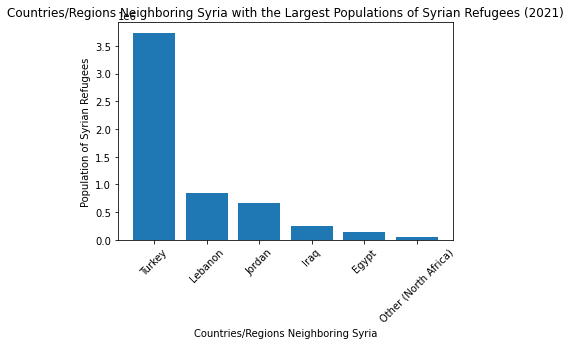

In [26]:
import matplotlib.pyplot as plt

plt.bar(neighboring_refugees_df['Country/Region'], neighboring_refugees_df['Total Number of Syrian Refugees & Asylum Seekers (2021)'])
plt.xticks(rotation=45)
plt.xlabel('Countries/Regions Neighboring Syria')
plt.ylabel('Population of Syrian Refugees')
plt.title('Countries/Regions Neighboring Syria with the Largest Populations of Syrian Refugees (2021)')

We can further visualize the increase in the total number of refugees in Turkey, Jordan, and Lebanon using the World Bank data, particularly within the last ten years.

In [27]:
jordan_refugees = wbdata.get_dataframe(refugee_variables, country="JOR")
jordan_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,3009517.0,2489.0
2019,2966079.0,2313.0
2018,2957877.0,2426.0
2017,2897751.0,2119.0
2016,2860679.0,1919.0
...,...,...
1964,678985.0,NaN
1963,662525.0,NaN
1962,644940.0,NaN


In [28]:
jordan_refugees["Refugee population by country or territory of asylum"].iplot(xTitle = 'Year', yTitle = 'Number of Refugees in Syria')

In [29]:
lebanon_refugees = wbdata.get_dataframe(refugee_variables, country='LBN')
lebanon_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,1349955.0,5495.0
2019,1392174.0,5647.0
2018,1424728.0,5621.0
2017,1468431.0,5302.0
2016,1476623.0,4719.0
...,...,...
1964,158584.0,NaN
1963,152747.0,NaN
1962,146969.0,NaN


In [30]:
lebanon_refugees["Refugee population by country or territory of asylum"].iplot(xTitle = 'Year', yTitle = 'Number of Refugees in Syria')

In [31]:
turkey_refugees = wbdata.get_dataframe(refugee_variables, country='TUR')
turkey_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,3652362.0,93738.0
2019,3579531.0,83239.0
2018,3681688.0,68900.0
2017,3480350.0,61383.0
2016,2869419.0,57915.0
...,...,...
1964,2300.0,NaN
1963,2300.0,NaN
1962,2300.0,NaN


In [32]:
turkey_refugees["Refugee population by country or territory of asylum"].iplot(xTitle = 'Year', yTitle = 'Number of Refugees in Syria')

We also took a closer look at the demographics of Syrian refugees within Turkey, Lebanon, and Jordan. Below, we have compiled information about the populations of Syrian refugees in different governorates/regions in Turkey, Lebanon, and Jordan. We also constructed a map that indicates these regions with markers.

In [35]:
jordan_regions = pd.DataFrame({'Jordanian Governorate': ['Amman', 'Mafrak', 'Irbid', 'Zarqa', 'Balqa', 'Madaba', 'Jarash', 'Karak', 'Maan', 'Ajlun', 'Aqaba', 'Tafilah'], 
                               'Population': [199204, 168792, 136279, 98483, 17978, 13438, 9295, 8532, 8352, 6435, 3814, 1705]
                              })
jordan_regions



,Jordanian Governorate,Population
0,Amman,199204
1,Mafrak,168792
2,Irbid,136279
3,Zarqa,98483
4,Balqa,17978
5,Madaba,13438
6,Jarash,9295
7,Karak,8532
8,Maan,8352
9,Ajlun,6435


Text(0.5, 1.0, 'Population of Syrian Refugees per Jordanian Governorate')

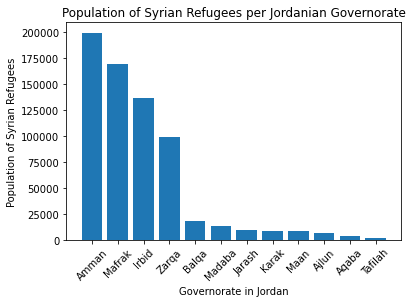

In [40]:
import matplotlib.pyplot as plt

plt.bar(jordan_regions['Jordanian Governorate'], jordan_regions['Population'])
plt.xlabel('Governorate in Jordan')
plt.ylabel('Population of Syrian Refugees')
plt.xticks(rotation=45)
plt.title('Population of Syrian Refugees per Jordanian Governorate')

In [42]:
lebanon_regions = pd.DataFrame({'Lebanese Governorate': ['Akkar', 'North', 'Baalbel-El Hermel', 'Mount Lebanon', 'Bekaa', 'Nabatieh', 'South'], 
                                'Population': [104537, 126064, 119195, 183669, 215473, 32557, 59936]
    
})
lebanon_regions

,Lebanese Governorate,Population
0,Akkar,104537
1,North,126064
2,Baalbel-El Hermel,119195
3,Mount Lebanon,183669
4,Bekaa,215473
5,Nabatieh,32557
6,South,59936


Text(0.5, 1.0, 'Population of Syrian Refugees per Lebanese Governorate')

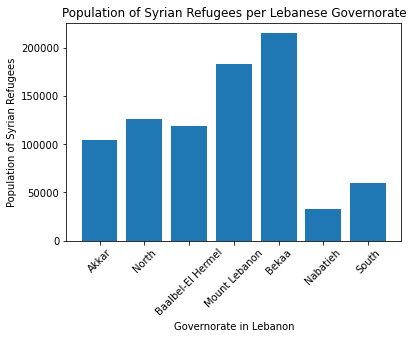

In [43]:
plt.bar(lebanon_regions['Lebanese Governorate'], lebanon_regions['Population'])
plt.xlabel('Governorate in Lebanon')
plt.ylabel('Population of Syrian Refugees')
plt.xticks(rotation=45)
plt.title('Population of Syrian Refugees per Lebanese Governorate')

In [44]:
import folium

In [45]:
my_map = folium.Map()

In [46]:
locations = pd.DataFrame({
    'lat':[31.9539, 32.3417, 32.5568, 32.0608, 32.0367,
           31.7193, 32.2747, 31.1853, 30.1927, 32.3326,
           29.5321, 30.8837, 41.0082, 36.2023, 37.1674, 
           37.0660, 36.7165, 37.5753, 37.7636, 37.0746, 36.9914,
          34.5440, 34.0047, 34.4381, 33.8101, 33.8463, 33.3772, 33.2721],
   'lon':[35.9106, 36.2020, 35.8469, 36.0942, 35.7288, 
          35.7932, 35.8961, 35.7048, 35.7249, 35.7517, 
          35.0063, 35.6161, 28.9784, 36.1613, 38.7955, 
          37.3781, 37.1147, 36.9228, 38.2773, 36.2464, 35.3308,
         36.0798, 36.2110, 35.9308, 35.5973, 35.9019, 35.4836, 35.2033],
   'name':['Amman', 'Mafrak', 'Irbid', 'Zarqa', 'Balqa', 
           'Madaba', 'Jarash', 'Karak', 'Maan', 'Ajlun', 
           'Aqaba', 'Tafilah', 'Istanbul', 'Hatay', 'Sanliurfa', 
           'Gaziantep','Kilis', 'Kahramanmaras', 'Adiyaman', 'Osmaniye', 'Adana', 
          'Akkar', 'Baalbek-El Hermel', 'North', 'Mount Lebanon', 'Bekaa', 'Nabatieh', 'South']
}, dtype=str)

locations

,lat,lon,name
0,31.9539,35.9106,Amman
1,32.3417,36.202,Mafrak
2,32.5568,35.8469,Irbid
3,32.0608,36.0942,Zarqa
4,32.0367,35.7288,Balqa
5,31.7193,35.7932,Madaba
6,32.2747,35.8961,Jarash
7,31.1853,35.7048,Karak
8,30.1927,35.7249,Maan
9,32.3326,35.7517,Ajlun


In [47]:
for i in range(0,len(locations)):
    folium.Marker(
      location=[locations.iloc[i]['lat'], locations.iloc[i]['lon']],
      popup=locations.iloc[i]['name'],
   ).add_to(my_map)

my_map

# Fertility Rate in Syria

In [34]:
syria["Total Fertility Rate"].iplot(xTitle = 'Year', yTitle = 'Average Number of Children')